In [1]:
### Policing and Environment Group Assignment Two
# We merged our environmental justice scores data frame with the LA census data for 2012 data frame with the object "FIPS".
# By adding a leading *zero* to our EJSM data, we were able to geographically match the two data frames. 
# The cumulative impact score includes the variables of climate change vulnerability, environmental hazards, social vulnerability, and health scores. 
# We chose to map the hazard, social vulnerability, and cumulative impact scores to demonstrate some of the overlaps between negative environmental outcomes in areas with high scores of social vulnerabilities. 
# Our final maps display the disporportionate distributions of environmental degredation in South, Central, and East Los Angeles. 

In [47]:
import geopandas as gpd
import pandas as pd

In [48]:
# import LA environmental justice score data 
df = pd.read_csv(
'Data/EJSM_Scores/EJSM_Scores (1).csv' ,
dtype={
    'Tract_1':str
})

In [49]:
# add number zero leading the FIPS code for merging the data with the census tract data
df['Tract_1'] = df['Tract_1'].str.zfill(11)
df.head()

,OBJECTID,Tract_1,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,1,06037920336,10,3,1,4,2,2.438560e+06,8124.373091
1,2,06037920044,4,1,1,1,1,1.470811e+06,5545.298452
2,3,06037573003,13,5,3,3,2,6.528168e+05,3310.743793
3,4,06037571704,13,3,2,4,4,6.994011e+05,4113.477175
4,5,06037570403,17,5,3,5,4,8.317839e+05,3887.000394


In [50]:
# import 2012 census data
tracts=gpd.read_file('Data/CensusData2012/census-tracts-2012.geojson')
print(tracts)

                     kind  external_id         name  \
0     Census Tract (2012)  06037101110  06037101110   
1     Census Tract (2012)  06037101122  06037101122   
2     Census Tract (2012)  06037101210  06037101210   
3     Census Tract (2012)  06037101220  06037101220   
4     Census Tract (2012)  06037101300  06037101300   
...                   ...          ...          ...   
2341  Census Tract (2012)  06037980031  06037980031   
2342  Census Tract (2012)  06037980033  06037980033   
2343  Census Tract (2012)  06037990100  06037990100   
2344  Census Tract (2012)  06037990200  06037990200   
2345  Census Tract (2012)  06037990300  06037990300   

                               slug                                    set  \
0     06037101110-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
1     06037101122-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
2     06037101210-census-tract-2012  /1.0/boundary-set/census-tracts-2012/   
3     06037101220-census-tr

In [51]:
# list column names
list(tracts)

['kind',
 'external_id',
 'name',
 'slug',
 'set',
 'metadata',
 'resource_uri',
 'geometry']

In [52]:
# drop columns
columns_to_drop = ['set','kind','resource_uri','metadata']

In [53]:
# read columns 
tracts.head()

,kind,external_id,name,slug,set,metadata,resource_uri,geometry
0,Census Tract (2012),06037101110,06037101110,06037101110-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2594737', 'NAME': '1011.10',...",/1.0/boundary/06037101110-census-tract-2012/,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,Census Tract (2012),06037101122,06037101122,06037101122-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2677213', 'NAME': '1011.22',...",/1.0/boundary/06037101122-census-tract-2012/,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,Census Tract (2012),06037101210,06037101210,06037101210-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2529724', 'NAME': '1012.10',...",/1.0/boundary/06037101210-census-tract-2012/,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,Census Tract (2012),06037101220,06037101220,06037101220-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2516085', 'NAME': '1012.20',...",/1.0/boundary/06037101220-census-tract-2012/,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,Census Tract (2012),06037101300,06037101300,06037101300-census-tract-2012,/1.0/boundary-set/census-tracts-2012/,"{'INTPTLAT': '+34.2487732', 'NAME': '1013', 'I...",/1.0/boundary/06037101300-census-tract-2012/,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [54]:
# drop columns from tracts data
tracts = tracts.drop(columns_to_drop,axis=1)

In [55]:
tracts.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   external_id  2346 non-null   object  
 1   name         2346 non-null   object  
 2   slug         2346 non-null   object  
 3   geometry     2346 non-null   geometry
dtypes: geometry(1), object(3)
memory usage: 73.4+ KB


In [56]:
# isolate the FIPS code and geometry column to match with the EJSM data
tracts = tracts[['name','geometry']]
tracts.head()

,name,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


In [57]:
# show columns
tracts.columns = ['FIPS','geometry']
tracts.head()

,FIPS,geometry
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007..."
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031..."
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859..."
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859..."
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719..."


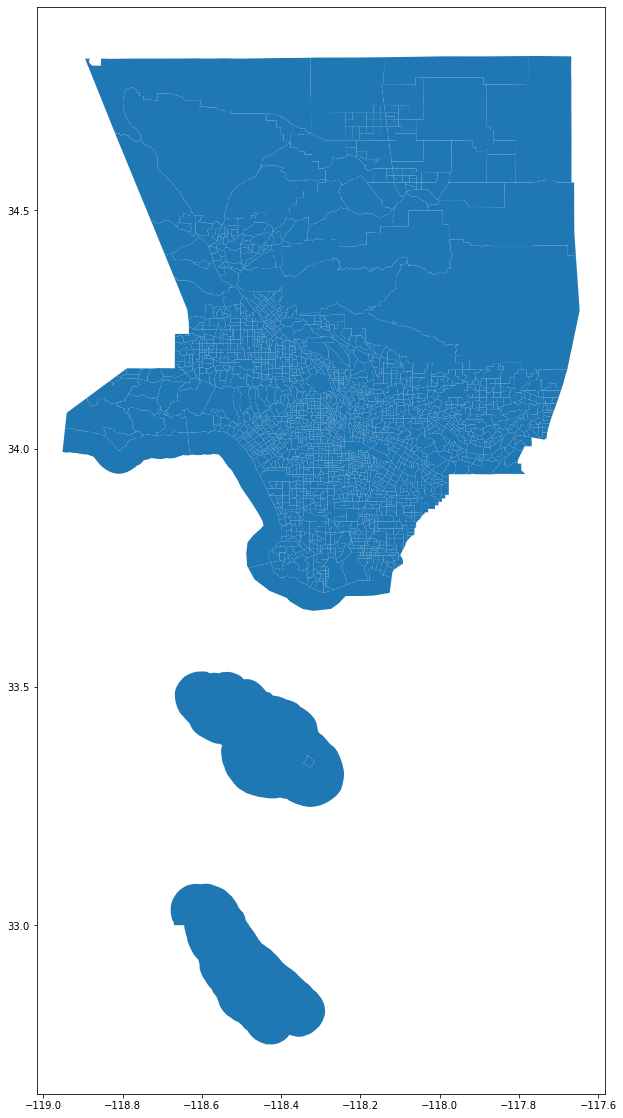

In [58]:
#plot tracts
tracts.plot(figsize=(24,20))

In [59]:
# list EJSM df with new FIPS code
list(df)

['OBJECTID',
 'Tract_1',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']

In [60]:
# show data
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       2343 non-null   int64  
 1   Tract_1        2343 non-null   object 
 2   CIscore        2343 non-null   int64  
 3   HazScore       2343 non-null   int64  
 4   HealthScore    2343 non-null   int64  
 5   SVscore        2343 non-null   int64  
 6   CCVscore       2343 non-null   int64  
 7   Shape__Area    2343 non-null   float64
 8   Shape__Length  2343 non-null   float64
dtypes: float64(2), int64(6), object(1)
memory usage: 164.9+ KB


In [61]:
# rename object Tract_1 to FIPS to match census tract data
df.columns = ['OBJECTID',
 'FIPS',
 'CIscore',
 'HazScore',
 'HealthScore',
 'SVscore',
 'CCVscore',
 'Shape__Area',
 'Shape__Length']
df.head()

,OBJECTID,FIPS,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,1,06037920336,10,3,1,4,2,2.438560e+06,8124.373091
1,2,06037920044,4,1,1,1,1,1.470811e+06,5545.298452
2,3,06037573003,13,5,3,3,2,6.528168e+05,3310.743793
3,4,06037571704,13,3,2,4,4,6.994011e+05,4113.477175
4,5,06037570403,17,5,3,5,4,8.317839e+05,3887.000394


In [62]:
# merge data on the same object FIPS
tracts_ejsm=tracts.merge(df,on="FIPS")

In [63]:
# show merge with census data (only population)
tracts_ejsm.head()

,FIPS,geometry,OBJECTID,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",1464,10,3,1,3,3,1.677572e+06,5561.283410
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",672,4,1,1,1,1,3.891711e+06,11660.850429
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",1446,14,4,1,4,5,9.516179e+05,4451.778658
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",1703,12,3,1,4,4,1.026836e+06,4673.869604
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",1579,5,1,1,1,2,3.781233e+06,10813.184183


In [64]:
# describe stats by cumulative impact score
tracts_ejsm['CIscore'].describe()

count    2342.000000
mean       12.007259
std         4.352322
min         0.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        20.000000
Name: CIscore, dtype: float64

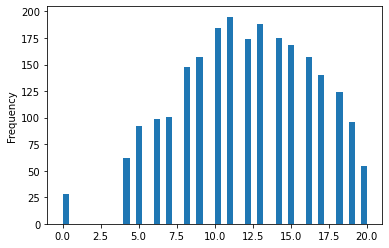

In [65]:
# plot histogram for cumulative impact score
tracts_ejsm['CIscore'].plot.hist(bins=50)

In [66]:
# describe stats by proximity to hazard score
tracts_ejsm['HazScore'].describe()

count    2342.000000
mean        2.976943
std         1.434123
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: HazScore, dtype: float64

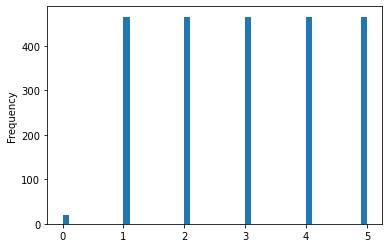

In [67]:
# plot histogram for proximity to hazard score
tracts_ejsm['HazScore'].plot.hist(bins=50)

In [68]:
# describe stats by proximity to hazard score
tracts_ejsm['SVscore'].describe()

count    2342.000000
mean        2.948335
std         1.434122
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: SVscore, dtype: float64

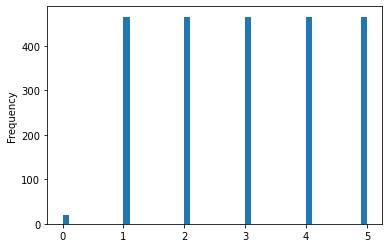

In [69]:
# plot histogram for proximity to hazard score
tracts_ejsm['HazScore'].plot.hist(bins=50)

In [70]:
# new object to show the sorted data- not much deifference. 
tracts_ejsm_sorted = tracts_ejsm.sort_values(by='CIscore',ascending = False)

In [71]:
# sorted data has no variation
tracts_ejsm_sorted[['FIPS','CIscore','HazScore','SVscore']].head(10)

,FIPS,CIscore,HazScore,SVscore
1325,06037433501,20,5,5
1530,06037530301,20,5,5
594,06037211922,20,5,5
532,06037206032,20,5,5
533,06037206050,20,5,5
660,06037219300,20,5,5
581,06037211310,20,5,5
672,06037221302,20,5,5
719,06037228900,20,5,5
1637,06037535605,20,5,5


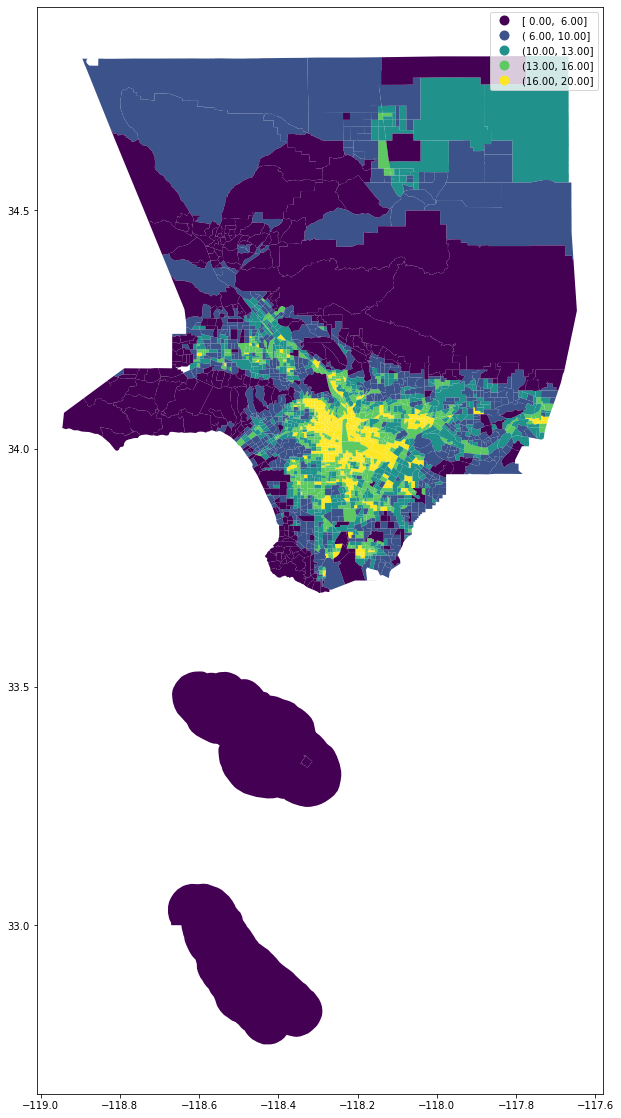

In [72]:
# plot shows the data with natural breaks
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='CIscore',
                 legend=True, 
                 scheme='NaturalBreaks')

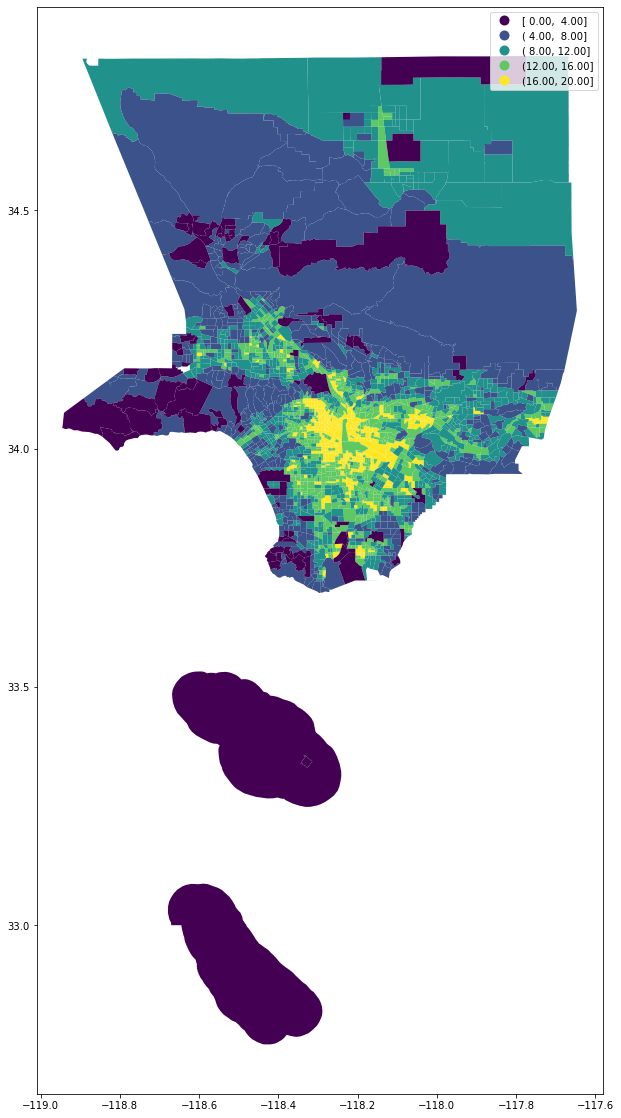

In [73]:
# equal intervalfor Cumulative Impact Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='CIscore',
                 legend=True, 
                 scheme='equal_interval')

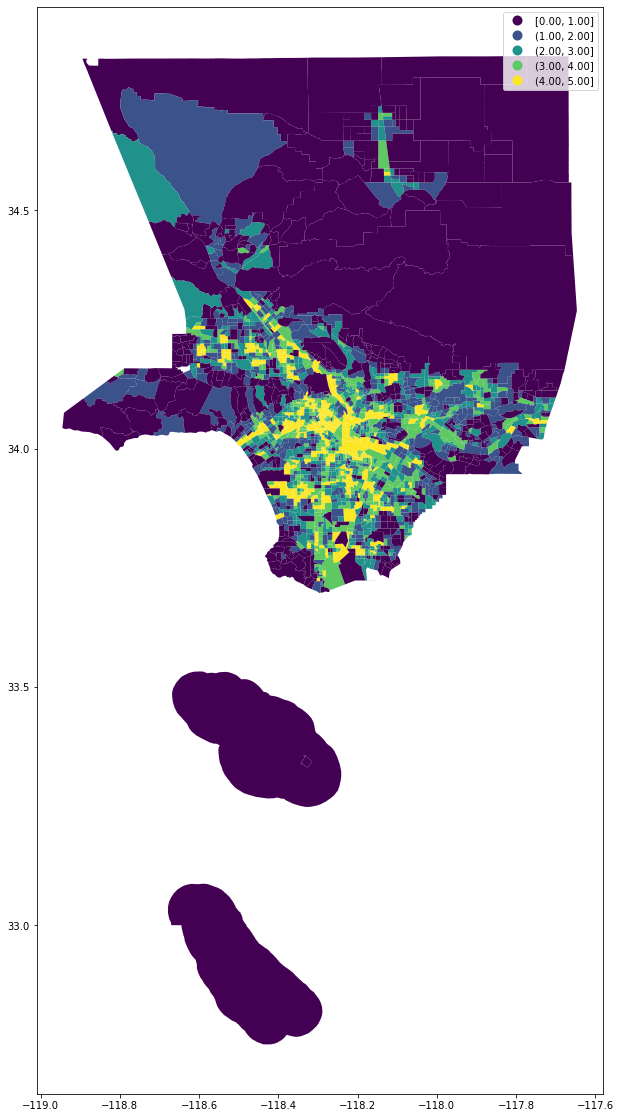

In [74]:
# equal interval for Proximity to Hazard Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='HazScore',
                 legend=True, 
                 scheme='equal_interval')

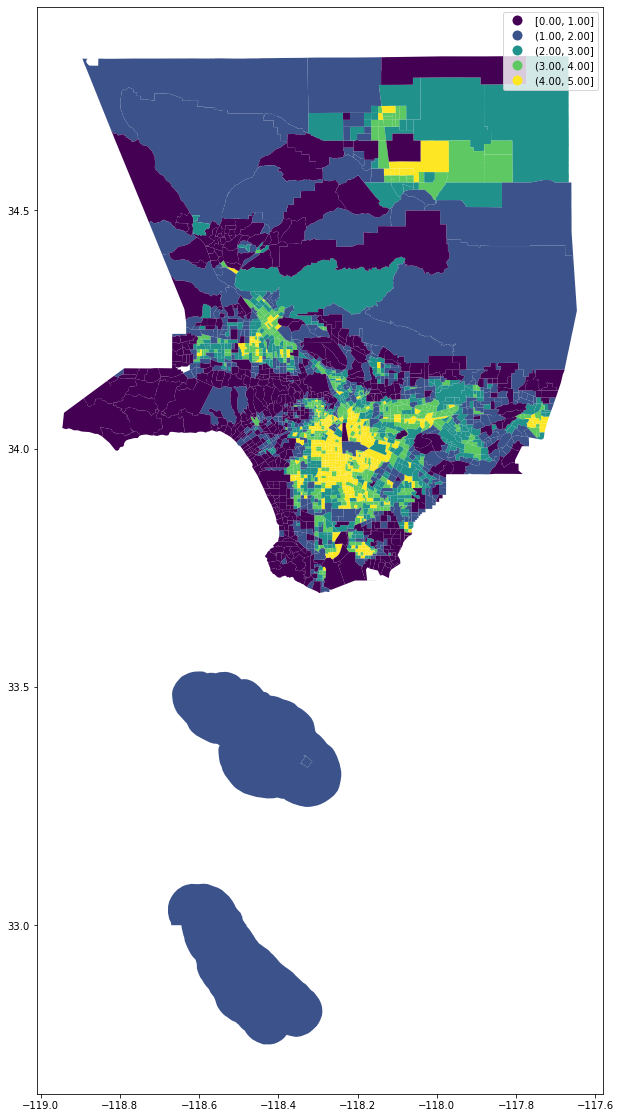

In [75]:
# equal intervalfor Social Vulnerability Score -by standard deviation 
tracts_ejsm_sorted.plot(figsize=(24,20),
                 column='SVscore',
                 legend=True, 
                 scheme='equal_interval')

In [76]:
# import
import folium

In [77]:
# This section is an addition for the midterm 

In [78]:
import plotly.express as px
from sodapy import Socrata

In [79]:
client = Socrata("data.lacity.org", None)
results = client.get("amvf-fr72", limit=10000)
df = pd.DataFrame.from_records(results)
df.sample(3)

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,:@computed_region_kqwf_mjcx,:@computed_region_2dna_qi2s,chrg_grp_cd,grp_description,chrg_desc,crsst,bkg_date,bkg_time,bgk_location,bkg_loc_cd
1900,6009302,BOOKING,2020-09-10T00:00:00.000,0115,12,77th Street,1245,32,M,B,...,14,35,03,Robbery,ROBBERY,NaN,2020-09-10T00:00:00.000,0548,77TH ST,4212
3935,5969077,BOOKING,2020-07-09T00:00:00.000,2040,13,Newton,1381,22,M,H,...,13,46,22,Driving Under Influence,DUI OF ANY DRUG,FLORENCE,2020-07-09T00:00:00.000,2209,METRO - JAIL DIVISION,4273
3922,5968171,BOOKING,2020-07-08T00:00:00.000,1740,05,Harbor,0528,57,M,H,...,15,15,12,Weapon (carry/poss),ILLEGAL POSSESSION OF AMMUNITION,BLINN,2020-07-08T00:00:00.000,1851,HARBOR,4205


In [80]:
df = pd.DataFrame.from_records(results)

In [81]:
df.grp_description.unique()

array([nan, 'Liquor Laws', 'Drunkeness', 'Aggravated Assault',
       'Driving Under Influence', 'Prostitution/Allied',
       'Narcotic Drug Laws', 'Robbery', 'Burglary', 'Disorderly Conduct',
       'Gambling', 'Other Assaults', 'Miscellaneous Other Violations',
       'Against Family/Child', 'Fraud/Embezzlement', 'Vehicle Theft',
       'Weapon (carry/poss)', 'Moving Traffic Violations',
       'Forgery/Counterfeit', 'Homicide', 'Receive Stolen Property',
       'Non-Criminal Detention', 'Larceny', 'Sex (except rape/prst)',
       'Rape', 'Disturbing the Peace', 'Pre-Delinquency'], dtype=object)

In [82]:
df.arst_typ_cd.unique()

array(['M', 'I', 'F', 'D', 'O'], dtype=object)

In [83]:
df_subset = df[['arst_date','grp_description','arst_typ_cd','lat','lon']].copy()

In [84]:
arrest_by_charge = df.grp_description.value_counts().reset_index()
arrest_by_charge

,index,grp_description
0,Aggravated Assault,1567
1,Miscellaneous Other Violations,1383
2,Driving Under Influence,995
3,Other Assaults,882
4,Narcotic Drug Laws,866
5,Vehicle Theft,661
6,Weapon (carry/poss),519
7,Burglary,452
8,Robbery,329
9,Larceny,255


In [85]:
arst_typ_cd = df.arst_typ_cd.value_counts().reset_index()
arst_typ_cd

,index,arst_typ_cd
0,F,5554
1,M,3723
2,I,562
3,O,82
4,D,79


In [86]:
crime = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))

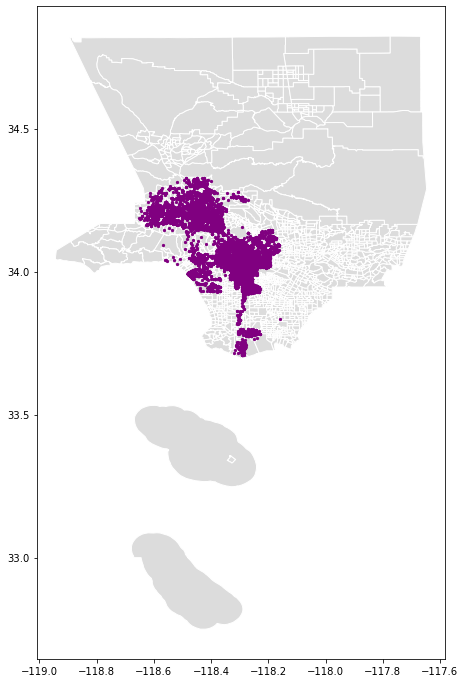

In [87]:
base = tracts_ejsm.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, color='purple', markersize=5)

In [88]:
minx, miny, maxx, maxy = crime.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-118.6536
-118.1589
33.707
34.3274


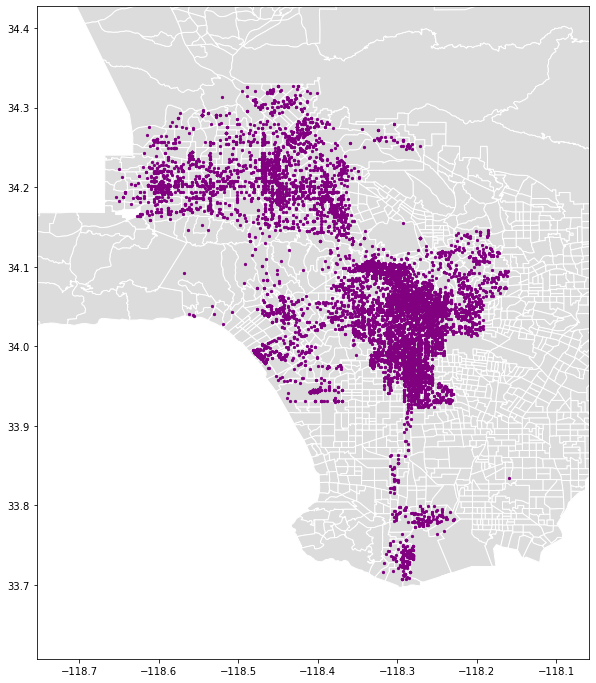

In [90]:
base = tracts_ejsm.plot(figsize=(12,12),color='gainsboro', edgecolor='white')
ax = crime.plot(ax=base, marker='o', color='purple', markersize=5)
ax.set_xlim(minx - .1, maxx + .1)
ax.set_ylim(miny - .1, maxy + .1)
ax

In [91]:
crime.set_crs(epsg=4326, inplace=True)
crime.crs
crime.head()

,rpt_id,report_type,arst_date,time,area,area_desc,rd,age,sex_cd,descent_cd,...,:@computed_region_2dna_qi2s,chrg_grp_cd,grp_description,chrg_desc,crsst,bkg_date,bkg_time,bgk_location,bkg_loc_cd,geometry
0,201417152,RFC,2020-09-14T00:00:00.000,1000,14,Pacific,1494,31,M,B,...,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-118.40060 33.94550)
1,202111570,RFC,2020-07-09T00:00:00.000,1830,21,Topanga,2125,29,M,H,...,37,17,Liquor Laws,DRINKING ALCOHOL,NaN,NaN,NaN,NaN,NaN,POINT (-118.60310 34.21290)
2,202112432,RFC,2020-07-29T00:00:00.000,1455,21,Topanga,2189,39,M,W,...,49,NaN,NaN,NaN,VENTURA FY,NaN,NaN,NaN,NaN,POINT (-118.57090 34.17210)
3,202114002,RFC,2020-09-16T00:00:00.000,1340,21,Topanga,2157,42,M,H,...,66,17,Liquor Laws,DRINKING ALCOHOL,VANOWEN,NaN,NaN,NaN,NaN,POINT (-118.58840 34.19380)
4,201711929,RFC,2020-07-23T00:00:00.000,1815,17,Devonshire,1752,39,M,H,...,43,NaN,NaN,NaN,LASSEN,NaN,NaN,NaN,NaN,POINT (-118.58860 34.25000)


In [92]:
tracts_ejsm.crs
tracts_ejsm.head()

,FIPS,geometry,OBJECTID,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length
0,06037101110,"MULTIPOLYGON (((-118.30229 34.25870, -118.3007...",1464,10,3,1,3,3,1.677572e+06,5561.283410
1,06037101122,"MULTIPOLYGON (((-118.30333 34.27354, -118.3031...",672,4,1,1,1,1,3.891711e+06,11660.850429
2,06037101210,"MULTIPOLYGON (((-118.29945 34.25598, -118.2859...",1446,14,4,1,4,5,9.516179e+05,4451.778658
3,06037101220,"MULTIPOLYGON (((-118.28592 34.24896, -118.2859...",1703,12,3,1,4,4,1.026836e+06,4673.869604
4,06037101300,"MULTIPOLYGON (((-118.27247 34.23253, -118.2719...",1579,5,1,1,1,2,3.781233e+06,10813.184183


In [93]:
join = gpd.sjoin(tracts_ejsm,
                 crime,
                 how='right')

In [94]:
join.sample(5)

,index_left,FIPS,OBJECTID,CIscore,HazScore,HealthScore,SVscore,CCVscore,Shape__Area,Shape__Length,...,:@computed_region_2dna_qi2s,chrg_grp_cd,grp_description,chrg_desc,crsst,bkg_date,bkg_time,bgk_location,bkg_loc_cd,geometry
9122,703.0,06037226420,654.0,17.0,3.0,5.0,5.0,4.0,6.231183e+05,3232.350354,...,6,08,Other Assaults,BATT EX-SPOUSE/FIANCEE/PERSN W/DATING REL,NaN,2020-07-29T00:00:00.000,1657,77TH ST,4212,POINT (-118.25920 34.02060)
9219,36.0,06037106010,2190.0,8.0,2.0,1.0,3.0,2.0,3.711885e+06,8837.427045,...,47,05,Burglary,BURGLARY,FOOTHILL,2020-07-23T00:00:00.000,1118,VALLEY - JAIL DIV,4279,POINT (-118.44680 34.32180)
6416,235.0,06037128102,1433.0,14.0,3.0,2.0,5.0,4.0,9.506675e+05,3900.103460,...,18,22,Driving Under Influence,DUI ALCOHOL CAUSING INJURY,NaN,2020-07-13T00:00:00.000,0205,VALLEY - JAIL DIV,4279,POINT (-118.44790 34.19070)
8527,943.0,06037293201,1903.0,11.0,4.0,3.0,3.0,1.0,1.558658e+06,5126.983148,...,55,04,Aggravated Assault,CORPORAL INJURY ON SPOUSE/COHABITANT/ETC,NaN,2020-07-16T00:00:00.000,0648,HARBOR,4205,POINT (-118.30390 33.83280)
9386,231.0,06037127806,1435.0,14.0,4.0,2.0,4.0,4.0,1.000943e+06,4968.580082,...,18,09,Forgery/Counterfeit,ACQUIRE ACCESS CARD IN 4+ NAMES > 12 MOS,FRIAR,2020-09-10T00:00:00.000,0005,VALLEY - JAIL DIV,4279,POINT (-118.45740 34.19030)


In [95]:
#there is a discrepancy in numbers
#list AG 
#06037980028	235
#1	06037273402	130
#2	06037206300	112
#3	06037237600	99
#4	06037190700	86
crime_by_tracts = join.FIPS.value_counts().rename_axis('tract').reset_index(name='crime_count')
crime_by_tracts.head()

,tract,crime_count
0,06037980028,227
1,06037273402,135
2,06037206300,108
3,06037237600,102
4,06037190700,89


In [96]:
crime_by_tracts.keys()

Index(['tract', 'crime_count'], dtype='object')

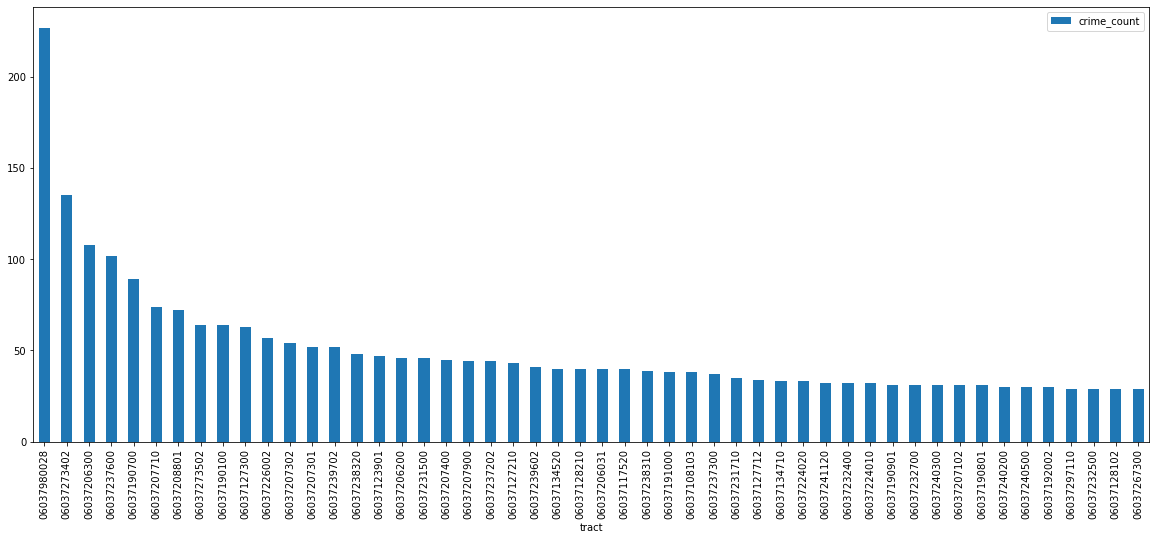

In [97]:
#plot bar
crime_by_tracts[:50].plot.bar(figsize=(20,8),x='tract',y='crime_count')

In [ ]:

where = "grp_description IN ('Aggravated Assault', 'crime_type2'...)"

In [ ]:
crime_subset = df[['arst_date','grp_description','arst_typ_cd','lat','lon']].copy()

In [ ]:
df_subset.head()